In [122]:
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from sklearn.metrics import mean_squared_error

from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [123]:
def definingParamsLinear(X, y, Xval, yval,vals):
    acc = 0
    best_C=0
    best_gamma=0
    for i in vals:
        C= i
        classifier = SVC(C=C, kernel="linear")
        classifier.fit(X,y)
        prediction = classifier.predict(Xval)
        score = classifier.score(Xval,yval)
        if score>acc:
            acc =score
            best_C =C
    return best_C

def definingParamsGaussian(X, y, Xval, yval,vals):
    acc = 0
    best_C=0
    best_gamma=0
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C,gamma=gamma, kernel="rbf")
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_C =C
                best_gamma=gamma
    return best_C, best_gamma

def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X-mean)/std
    
    return X_norm , mean , std

In [124]:
relevant_features = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "diagnosis"]
data = pnd.read_csv("processed.cleveland.csv", names=relevant_features)

data.drop(data[data["ca"] == '?'].index, inplace=True)
data.drop(data[data["thal"] == '?'].index, inplace=True)
data = data.astype('float64') 

In [125]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [126]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [127]:
data_binary = data.copy()
data_binary["diagnosis"] = data_binary.diagnosis.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
data_binary.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


(array([160.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 137.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

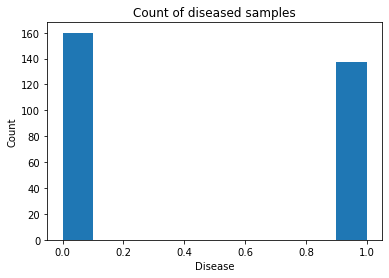

In [128]:
data_binary_n = data_binary.values

X_binary = data_binary_n[:,:-1]
y_binary = data_binary_n[:,-1]

plt.title("Count of diseased samples")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.hist(y_binary)

In [129]:
X_binary, mean_X, std_X = featureNormalization(X_binary)

X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_binary, y_binary, test_size = 0.2) #80/0/20

y_binary_train = y_binary_train.reshape(X_binary_train.shape[0],1)
y_binary_test = y_binary_test.reshape(X_binary_test.shape[0],1)

Linear kernel classification for the training data:  0.8565400843881856
Accuracy linear:  0.8333333333333334
Recall linear:  0.8076923076923077
Specify linear:  0.8529411764705882
Precision linear:  0.8076923076923077
F1 linear:  0.8076923076923077


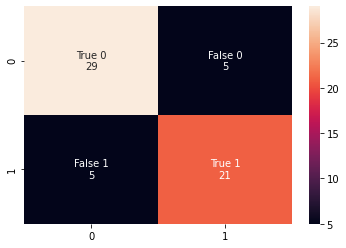

In [130]:
vals = [0.01,0.03,0.3,1,3,10,30]

best_C_linear = definingParamsLinear(X_binary_train, y_binary_train.ravel(), X_binary_test, y_binary_test.ravel(),vals)

classifier = SVC(C=best_C_linear, kernel="linear")
classifier.fit(X_binary_train,np.ravel(y_binary_train))
prediction = classifier.predict(X_binary_test)
cm_test_linear = confusion_matrix(prediction, y_binary_test)

group_names = ["True 0","False 0","False 1","True 1"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test_linear.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_test_linear, annot=labels, fmt="")

tn_linear = cm_test_linear[0][0]
fp_linear = cm_test_linear[1][0]
fn_linear = cm_test_linear[0][1]
tp_linear = cm_test_linear[1][1]

accuracy_linear = (tp_linear + tn_linear) / (tp_linear + tn_linear + fp_linear + fn_linear)
recall_linear = (tp_linear) / (tp_linear + fn_linear)
specifity_linear = (tn_linear) / (tn_linear + fp_linear)
precision_linear = (tp_linear) / (tp_linear + fp_linear)
F1_linear = 2*(recall_linear * precision_linear)/(recall_linear+precision_linear)

print("Linear kernel classification for the training data: ", classifier.score(X_binary_train,y_binary_train))
print("Accuracy linear: ", accuracy_linear)
print("Recall linear: ", recall_linear)
print("Specify linear: ", specifity_linear)
print("Precision linear: ", precision_linear)
print("F1 linear: ", F1_linear)

Gaussian kernel classifier for the training data:  0.9620253164556962
Accuracy gaussian:  0.85
Recall gaussian:  0.8461538461538461
Specify gaussian:  0.8529411764705882
Precision gaussian:  0.8148148148148148
F1 gaussian:  0.830188679245283


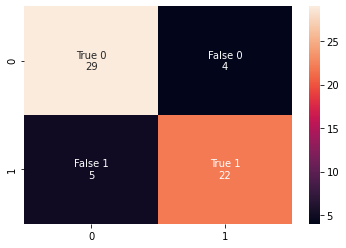

In [131]:
best_C_gaussian, best_gamma_gaussian = definingParamsGaussian(X_binary_train, y_binary_train.ravel(), X_binary_test, y_binary_test.ravel(),vals)

classifier = SVC(C=best_C_gaussian,gamma=best_gamma_gaussian, kernel="rbf")
classifier.fit(X_binary_train,np.ravel(y_binary_train))
prediction = classifier.predict(X_binary_test)
cm_test_gaussian = confusion_matrix(prediction, y_binary_test)

group_names = ["True 0","False 0","False 1","True 1"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test_gaussian.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_test_gaussian, annot=labels, fmt="")

tn_gaussian = cm_test_gaussian[0][0]
fp_gaussian = cm_test_gaussian[1][0]
fn_gaussian = cm_test_gaussian[0][1]
tp_gaussian = cm_test_gaussian[1][1]

accuracy_gaussian = (tp_gaussian + tn_gaussian) / (tp_gaussian + tn_gaussian + fp_gaussian + fn_gaussian)
recall_gaussian = (tp_gaussian) / (tp_gaussian + fn_gaussian)
specifity_gaussian = (tn_gaussian) / (tn_gaussian + fp_gaussian)
precision_gaussian = (tp_gaussian) / (tp_gaussian + fp_gaussian)
F1_gaussian = 2*(recall_gaussian * precision_gaussian)/(recall_gaussian+precision_gaussian)

print("Gaussian kernel classifier for the training data: ", classifier.score(X_binary_train,y_binary_train))
print("Accuracy gaussian: ", accuracy_gaussian)
print("Recall gaussian: ", recall_gaussian)
print("Specify gaussian: ", specifity_gaussian)
print("Precision gaussian: ", precision_gaussian)
print("F1 gaussian: ", F1_gaussian)

In [132]:
X_binary_train, X_binary_val, y_binary_train, y_binary_val = train_test_split(X_binary_train, y_binary_train, test_size = 0.25) #60/20/20
y_binary_val = y_binary_val.reshape(X_binary_val.shape[0],1)

In [159]:
vals = [0.01,0.03,0.1,0.3,1,3,10,30,100,300,1000,3000]

# Assuming that error has an inverse behavior of accuracy

accuracy_train = []
best_accuracy_train = 0
accuracy_val = []
best_accuracy_val = 0
# error_train = []
# error_val = []

Best_Cs = []
 
for i in vals:
    classifier = SVC(C=i, kernel="linear")
    classifier.fit(X_binary_train,np.ravel(y_binary_train))

    prediction = classifier.predict(X_binary_train)
    # cm_test = confusion_matrix(prediction, y_binary_train)
    # error = 1/(2*len(prediction)) * abs(cm_test[0][1]+cm_test[1][0])
    # error_train.append(error)
    accuracyTrain = metrics.accuracy_score(y_binary_train, prediction)
    accuracy_train.append(accuracyTrain)

    prediction = classifier.predict(X_binary_val)
    # cm_test = confusion_matrix(prediction, y_binary_val)
    # error = 1/(2*len(prediction)) * abs(cm_test[0][1]+cm_test[1][0])
    # error_val.append(error)
    accuracyVal = metrics.accuracy_score(y_binary_val, prediction)
    accuracy_val.append(accuracyVal)

    if(accuracyTrain - accuracyVal < 0.1):
        if(accuracyTrain == best_accuracy_train and accuracyVal == best_accuracy_val):
            Best_Cs.append(i)
        elif(accuracyTrain == best_accuracy_train and accuracyVal > best_accuracy_val):
            Best_Cs = []
            Best_Cs.append(i)
            best_accuracy_val = accuracyVal
        elif(accuracyTrain > best_accuracy_train and accuracyVal == best_accuracy_val):
            Best_Cs = []
            Best_Cs.append(i)
            best_accuracy_train = accuracyTrain
        elif(accuracyTrain > best_accuracy_train and accuracyVal > best_accuracy_val):
            Best_Cs = []
            Best_Cs.append(i)
            best_accuracy_train = accuracyTrain
            best_accuracy_val = accuracyVal

print(Best_Cs)

[3, 10, 30, 100, 300, 1000, 3000]


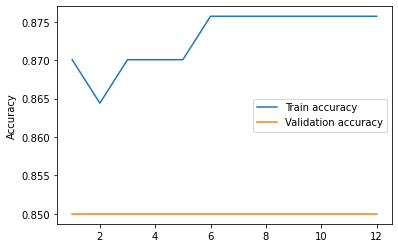

In [160]:
plt.plot(range(1,len(vals)+1),accuracy_train)
plt.plot(range(1,len(vals)+1),accuracy_val)
plt.ylabel("Accuracy")
plt.legend(["Train accuracy", "Validation accuracy"])

In [152]:
# plt.plot(range(1,len(vals)+1),error_train)
# plt.plot(range(1,len(vals)+1),error_val)
# plt.ylabel("Error")
# plt.legend(["Train error", "Validation error"])

Text(0.5, 0, 'Accuracy')

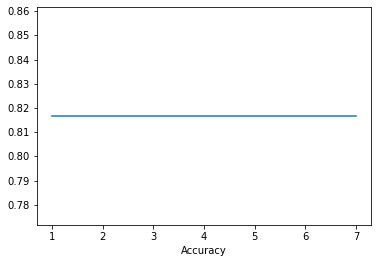

In [162]:
accuracy_test = []

Best_C_linear = 0

for i in Best_Cs:
    classifier = SVC(C=i, kernel="linear")
    classifier.fit(X_binary_train,np.ravel(y_binary_train))
    prediction = classifier.predict(X_binary_test)
    accuracy = metrics.accuracy_score(y_binary_test, prediction)

    accuracy_test.append(accuracy)

    if accuracy > Best_C_linear :
        Best_C_linear = i

plt.plot(range(1,len(Best_Cs)+1),accuracy_test)
plt.xlabel("Accuracy")

In [163]:
classifier = SVC(C=Best_C_linear, kernel="linear")
classifier.fit(X_binary_train,np.ravel(y_binary_train))
prediction = classifier.predict(X_binary_test)
accuracy = metrics.accuracy_score(y_binary_test, prediction)
precision = metrics.precision_score(y_binary_test, prediction)
recall = metrics.recall_score(y_binary_test, prediction)
f1_score = metrics.f1_score(y_binary_test, prediction)

classifier_score = classifier.score(X_binary_train,y_binary_train)

print("Classifier score: ", classifier_score)
print("Best C on linear kernel, after hyperparametrization according to the accuracy: ", Best_C_linear)
print("Accuracy: ", accuracy)
print("Precision: ",precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

Classifier score:  0.8757062146892656
Best C on linear kernel, after hyperparametrization according to the accuracy:  3
Accuracy:  0.8166666666666667
Precision:  0.8
Recall:  0.7692307692307693
F1 score:  0.7843137254901961


In [175]:
vals = [0.01,0.03,0.1,0.3,1,3,10,30,100,300,1000,3000]

# Assuming that error has an inverse behavior of accuracy

accuracy_train = []
best_accuracy_train = 0
accuracy_val = []
best_accuracy_val = 0
# error_train = []
# error_val = []

Best_Cs = []
Best_Lambdas = []
 
for i in vals:
    for j in vals:
        classifier = SVC(C=i, gamma=1/j, kernel="rbf")
        classifier.fit(X_binary_train,np.ravel(y_binary_train))

        prediction = classifier.predict(X_binary_train)
        accuracyTrain = metrics.accuracy_score(y_binary_train, prediction)
        accuracy_train.append(accuracyTrain)

        prediction = classifier.predict(X_binary_val)
        accuracyVal = metrics.accuracy_score(y_binary_val, prediction)
        accuracy_val.append(accuracyVal)


        if(accuracyTrain - accuracyVal < 0.1):
            if(accuracyTrain == best_accuracy_train and accuracyVal == best_accuracy_val):
                Best_Cs.append(i)
                Best_Lambdas.append(j)
            elif(accuracyTrain == best_accuracy_train and accuracyVal > best_accuracy_val):
                Best_Cs = []
                Best_Cs.append(i)
                Best_Lambdas = []
                Best_Lambdas.append(j)
                best_accuracy_val = accuracyVal
            elif(accuracyTrain > best_accuracy_train and accuracyVal == best_accuracy_val):
                Best_Cs = []
                Best_Cs.append(i)
                Best_Lambdas = []
                Best_Lambdas.append(j)
                best_accuracy_train = accuracyTrain
            elif(accuracyTrain > best_accuracy_train and accuracyVal > best_accuracy_val):
                Best_Cs = []
                Best_Cs.append(i)
                Best_Lambdas = []
                Best_Lambdas.append(j)
                best_accuracy_train = accuracyTrain
                best_accuracy_val = accuracyVal

print(Best_Cs)
print(Best_Lambdas)

[3, 30]
[30, 100]


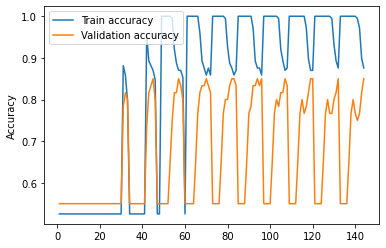

In [176]:
plt.plot(range(1,len(vals)*len(vals)+1),accuracy_train)
plt.plot(range(1,len(vals)*len(vals)+1),accuracy_val)
plt.ylabel("Accuracy")
plt.legend(["Train accuracy", "Validation accuracy"])

3
100
0.8166666666666667


Text(0.5, 0, 'Accuracy')

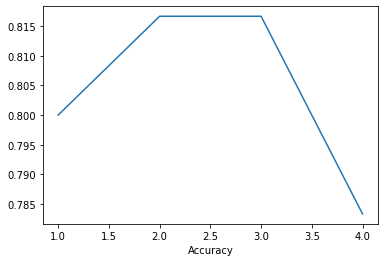

In [185]:
accuracy_test = []

Best_C_gaussian = 0
Best_Lambda_gaussian = 0
best_accuracy = 0

for i in Best_Cs:
    for j in Best_Lambdas:
        classifier = SVC(C=i,gamma=1/j, kernel="rbf")
        classifier.fit(X_binary_train,np.ravel(y_binary_train))
        prediction = classifier.predict(X_binary_test)
        accuracy = metrics.accuracy_score(y_binary_test, prediction)

        accuracy_test.append(accuracy)

        if accuracy > best_accuracy :
            Best_C_gaussian = i
            Best_Lambda_gaussian = j
            best_accuracy = accuracy

print(Best_C_gaussian)
print(Best_Lambda_gaussian)
print(best_accuracy)

plt.plot(range(1,len(Best_Cs)*len(Best_Lambdas)+1),accuracy_test)
plt.xlabel("Accuracy")

In [187]:
classifier = SVC(C=Best_C_gaussian, gamma=1/Best_Lambda_gaussian, kernel="rbf")
classifier.fit(X_binary_train,np.ravel(y_binary_train))
prediction = classifier.predict(X_binary_test)
accuracy = metrics.accuracy_score(y_binary_test, prediction)
precision = metrics.precision_score(y_binary_test, prediction)
recall = metrics.recall_score(y_binary_test, prediction)
f1_score = metrics.f1_score(y_binary_test, prediction)

classifier_score = classifier.score(X_binary_train,y_binary_train)

print("Classifier score: ", classifier_score)
print("Best C on gaussian kernel, after hyperparametrization according to the accuracy: ", Best_C_gaussian)
print("Best Lambda on gaussian kernel, after hyperparametrization according to the accuracy: ", Best_Lambda_gaussian)
print("Accuracy: ", accuracy)
print("Precision: ",precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

Classifier score:  0.8757062146892656
Best C on gaussian kernel, after hyperparametrization according to the accuracy:  3
Best Lambda on gaussian kernel, after hyperparametrization according to the accuracy:  100
Accuracy:  0.8166666666666667
Precision:  0.8
Recall:  0.7692307692307693
F1 score:  0.7843137254901961
